# Libreries

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Softmax, ReLU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from scipy import signal
from GDN_function import GDN

# Load and prepare the data

In [17]:
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()
(x_train_fas_mnist, y_train_fas_mnist), (x_test_fas_mnist, y_test_fas_mnist) = fashion_mnist.load_data()

In [19]:
x_train_mnist = x_train_mnist/255.0
x_test_mnist = x_test_mnist/255.0
x_train_fas_mnist = x_train_fas_mnist/255.0
x_test_fas_mnist = x_test_fas_mnist/255.0

x_train_mnist = x_train_mnist.reshape((60000, 28, 28, 1))
x_test_mnist = x_test_mnist.reshape((10000, 28, 28, 1))
x_train_fas_mnist = x_train_fas_mnist.reshape((60000, 28, 28, 1))
x_test_fas_mnist = x_test_fas_mnist.reshape((10000, 28, 28, 1))

# MNIST

## Check initial weights

In [25]:
# Model with only a GDN layer

model = Sequential()
model.add(GDN(input_shape = x_train_mnist.shape[1:4]))
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gdn_2 (GDN)                  (None, 28, 28, 1)         12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Check model weights
model.get_weights()

[array([0.001], dtype=float32),
 array([2.], dtype=float32),
 array([0.5], dtype=float32),
 array([[[[1.]],
 
         [[1.]],
 
         [[1.]]],
 
 
        [[[1.]],
 
         [[1.]],
 
         [[1.]]],
 
 
        [[[1.]],
 
         [[1.]],
 
         [[1.]]]], dtype=float32)]

## Output without training

In [27]:
# Apply the model without training
x_train_mnist_out = model.apply(x_train_mnist)
print(x_train_mnist_out.shape)

(60000, 28, 28, 1)


In [28]:
print(np.max(x_train_mnist_out[0]))

0.5272389


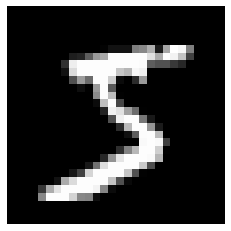

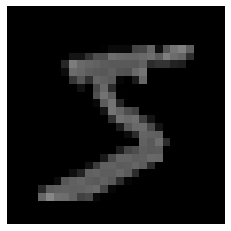

In [29]:
# Visualize model results
plt.imshow(x_train_mnist[0], cmap = 'gray', vmin = 0, vmax = 1)
plt.axis('off')
plt.show()
plt.imshow(x_train_mnist_out[0], cmap = 'gray', vmin = 0, vmax = 1)
plt.axis('off')
plt.show()

### Compare with scipy

In [30]:
# Do it by hand
test_1 = x_train_mnist[0][:,:,:]
print(np.matrix(test_1[15:20,15:20]), test_1.shape)
test_2 = test_1 ** [2]
print(np.matrix(test_2[15:20,15:20]), test_2.shape)
test_3 = signal.convolve(test_2, np.array([[1,1,1],[1,1,1],[1,1,1]]).reshape(3,3,1), mode = 'same', method = 'direct')
print(np.matrix(test_3[15:20,15:20]), test_3.shape)
test_4 = test_3 + 0.001
print(np.matrix(test_4[15:20,15:20]), test_4.shape)
test_5 = test_4 ** [0.5]
print(np.matrix(test_5[15:20,15:20]), test_5.shape)
test_6 = test_1 / test_5
print(np.matrix(test_6[15:20,15:20]), test_6.shape)

[[0.72941176 0.99215686 0.99215686 0.58823529 0.10588235]
 [0.0627451  0.36470588 0.98823529 0.99215686 0.73333333]
 [0.         0.         0.97647059 0.99215686 0.97647059]
 [0.50980392 0.71764706 0.99215686 0.99215686 0.81176471]
 [0.99215686 0.99215686 0.99215686 0.98039216 0.71372549]] (28, 28, 1)
[[0.53204152 0.98437524 0.98437524 0.34602076 0.01121107]
 [0.00393695 0.13301038 0.976609   0.98437524 0.53777778]
 [0.         0.         0.95349481 0.98437524 0.95349481]
 [0.25990004 0.5150173  0.98437524 0.98437524 0.65896194]
 [0.98437524 0.98437524 0.98437524 0.96116878 0.50940408]] (28, 28, 1)
[[4.53906959 5.80087659 5.62053057 4.06775855 1.88899654]
 [1.68450596 4.56784314 6.34663591 6.73173395 3.88024606]
 [0.944406   3.82634371 6.51563245 8.01783929 5.16641292]
 [3.58268358 5.66591311 7.35155709 7.97402537 5.11483276]
 [6.5358093  7.30248366 7.11294118 5.79753941 3.20753556]] (28, 28, 1)
[[4.54006959 5.80187659 5.62153057 4.06875855 1.88999654]
 [1.68550596 4.56884314 6.3476359

In [31]:
# Check the result is the same
print(np.matrix(np.array(x_train_mnist_out[0][15:20,15:20,:]).reshape(5,5)))

[[0.34232727 0.4119041  0.41845915 0.2916219  0.07701815]
 [0.04832977 0.17062384 0.39224225 0.3823707  0.37223384]
 [0.         0.         0.38251418 0.3503681  0.42955878]
 [0.26930127 0.30146554 0.36589894 0.3513292  0.35889882]
 [0.38805872 0.36712614 0.37198478 0.40713695 0.39845362]]


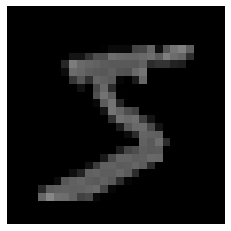

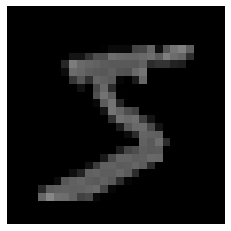

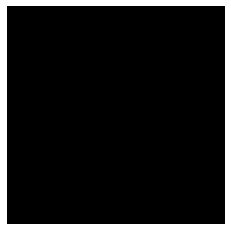

In [32]:
# Visualize the model and the handmade results
plt.imshow(test_6.reshape([28,28]), cmap = 'gray', vmin = 0, vmax = 1)
plt.axis('off')
plt.show()
plt.imshow(tf.squeeze(x_train_mnist_out[0]), cmap = 'gray', vmin = 0, vmax = 1)
plt.axis('off')
plt.show()
plt.imshow(test_6.reshape([28,28])-tf.squeeze(x_train_mnist_out[0]), cmap = 'gray', vmin = 0, vmax = 1)
plt.axis('off')
plt.show()

# Fashion MNIST

In [34]:
# Model with GDN
model_f = Sequential()
model_f.add(GDN(input_shape = x_train_fas_mnist.shape[1:4]))
model_f.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
model_f.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gdn_3 (GDN)                  (None, 28, 28, 1)         12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Apply the model
x_train_fas_mnist_out = model_f.apply(x_train_fas_mnist)
print(x_train_fas_mnist_out.shape)

(60000, 28, 28, 1)


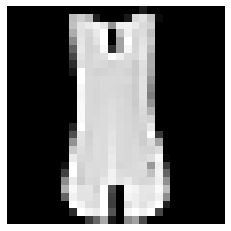

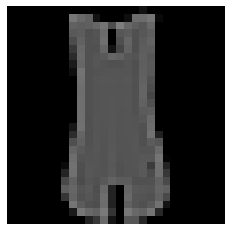

In [38]:
# Visualize the results
plt.imshow(x_train_fas_mnist[4], cmap = 'gray', vmin = 0, vmax = 1)
plt.axis('off')
plt.show()
plt.imshow(tf.squeeze(x_train_fas_mnist_out[4]), cmap = 'gray', vmin = 0, vmax = 1)
plt.axis('off')
plt.show()